# Two IEA15MW turbines: Instantaneous planes 7x2

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                 #'/ccs/proj/cfd162/lcheung/amr-wind-frontend.lcc/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/'
                ]
import sys, os, shutil, io
for x in amrwindfedirs: sys.path.insert(1, x)

import matplotlib.pyplot as plt
# Make all plots inline 
%matplotlib inline

In [2]:
import postproengine as ppeng	
import ruamel.yaml    
yaml = ruamel.yaml.YAML(typ='rt')
Loader= yaml.load
loaderkwargs = {}
dumperkwargs = {}

In [3]:
ALM_BD_dir='/lustre/orion/cfd162/world-shared/lcheung/ALCC_Frontier_WindFarm/farmruns/LowWS_LowTI/ABL_FSI_7x2/rundir_ALM_beamdyn'
ALM_ED_dir='/lustre/orion/cfd162/world-shared/lcheung/ALCC_Frontier_WindFarm/farmruns/LowWS_LowTI/ABL_FSI_7x2/rundir_ALM_elastodyn'
FSI_ED_dir='/lustre/orion/cfd162/world-shared/lcheung/ALCC_Frontier_WindFarm/farmruns/LowWS_LowTI/ABL_FSI_7x2/twoturbine_iea15mw_lowTI_lowWS_7x2_prod.flight'
time='{time:0.2f}'

In [32]:
yamlstring="""
globalattributes:
  verbose: True
  #udfmodules:
  #- testmod.py
  executeorder:
  - workflow1

# This is a template anchor meant to be copied over
instantplotstuff: &iplotanchor
  #plotfunc: "lambda db,i: db['velocityx'][i]"
  xscalefunc: 'lambda x: (x-2280.0)/240.0'
  yscalefunc: 'lambda y: (y-1000.0)/240.0'
  fontsize: 8
  xlabel: 'x/D'
  ylabel: 'y/D'
  clevels: 'np.linspace(0, 10, 101)'
  #postplotfunc: postproengine.postplot

workflow1:
  instantaneousplanes:
  - name: ALM_ED_instant
    ncfile: {ALM_ED_dir}/post_processing/XY_35000.nc
    times: [17794 ] #[ 17633 ]
    iters: [-1]
    xaxis: x
    yaxis: y
    iplane: 1
    plot:
      << : *iplotanchor
      title: 'ALM Elastodyn T={time}s'
      figname: fig1
      axesnumfunc: 'lambda i: 0'
  - name: ALM_BD_instant
    ncfile: {ALM_BD_dir}/post_processing/XY_61500.nc
    #times: [ 17633 ]
    iters: [ -1 ]
    xaxis: x
    yaxis: y
    iplane: 1
    plot:
      << : *iplotanchor
      title: 'ALM Beamdyn T={time}s'
      figname: fig1
      axesnumfunc: 'lambda i: 1'
  - name: FSI_ED_instant
    ncfile: {FSI_ED_dir}/post_processing/XY_53000.nc
    #times: [ 17590 ]
    iters: [-1]
    xaxis: x
    yaxis: y
    iplane: 1
    plot:
      << : *iplotanchor
      title: 'FSI Elastodyn T={time}s'
      figname: fig1
      axesnumfunc: 'lambda i: 2'
"""
f = io.StringIO(yamlstring.format(**vars()))
yamldict = Loader(f, **loaderkwargs)

Initialized instantaneousplanes
Running instantaneousplanes
extracting iter 588
Initialized plot inside instantaneousplanes
Executing plot
extracting iter -1
Initialized plot inside instantaneousplanes
Executing plot
extracting iter -1
Initialized plot inside instantaneousplanes
Executing plot


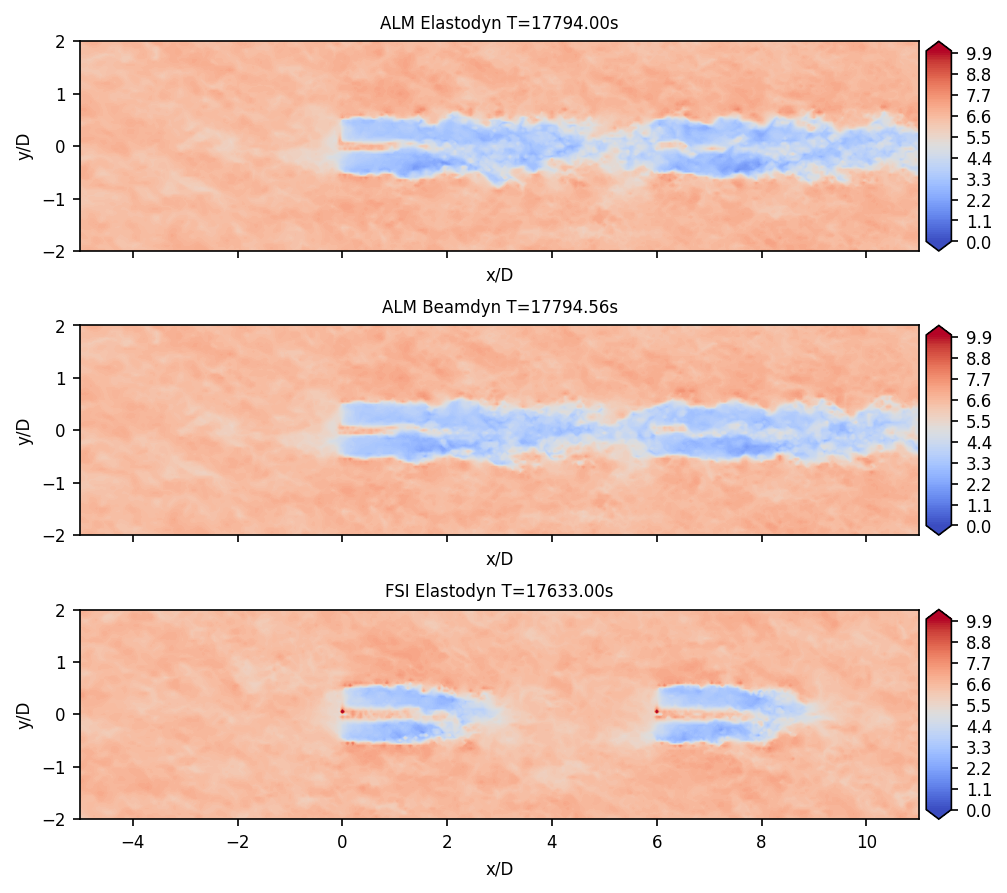

In [33]:
fig, axs = plt.subplots(3,1, figsize=(7,6), sharex=True, num="fig1", dpi=150)
# Run the driver
ppeng.driver(yamldict)
plt.tight_layout()
#plt.savefig(figdir+'/TripleDecompositionExample.png')